# **Classificação: Presença de Doença Cardíaca - Redes Neurais**

## Dependências

In [60]:
# dataset UCI

!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# tf, keras

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import Model
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import LeakyReLU, ReLU
from keras import regularizers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# np, Plt, seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# sk-learn

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('\nTensorFlow: {}'.format(tf.__version__))
print('Numpy: {}'.format(np.__version__))


TensorFlow: 2.17.0
Numpy: 1.26.4


## Dataset

In [61]:
# fetch dataset
dados = fetch_ucirepo(id=45)

features = dados.data.features
targets = dados.data.targets

df = features
df['target'] = targets
df['target'] = df['target'].apply(lambda x: 1 if x >= 1 else 0)
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## NAs, Split

In [62]:
df = df[~df.isin(['?'])]
df = df.dropna(axis=0)

In [63]:
# X, y split

X = df.drop(['target'], axis=1)
y =  df['target']

## Train_Test, Normalização

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
scaler = MinMaxScaler()

In [66]:
# Normalização

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train.shape

(237, 13)

## **Modelo Binário**

In [72]:
model = keras.Sequential()

# Entrada
model.add(keras.Input(shape=(13,)))

# Camada um
model.add(Dense(8, kernel_regularizer=regularizers.l2(0.001)))
model.add(LeakyReLU())
model.add(BatchNormalization())

# Camada dois
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001)))
model.add(LeakyReLU())
model.add(BatchNormalization())

# Dropout
model.add(Dropout(0.1))

# Camada tr~es
model.add(Dense(8, kernel_regularizer=regularizers.l2(0.001)))
model.add(LeakyReLU())
model.add(BatchNormalization())

model.add(Dense(4, kernel_regularizer=regularizers.l2(0.001)))
model.add(LeakyReLU())
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

In [73]:
model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Treinando o Modelo

history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    verbose=2,
    callbacks=[early_stopping]

)

Epoch 1/50
6/6 - 4s - 640ms/step - accuracy: 0.6032 - loss: 0.7112 - val_accuracy: 0.6875 - val_loss: 0.7182
Epoch 2/50
6/6 - 0s - 53ms/step - accuracy: 0.6402 - loss: 0.6808 - val_accuracy: 0.7500 - val_loss: 0.7153
Epoch 3/50
6/6 - 0s - 15ms/step - accuracy: 0.6720 - loss: 0.6484 - val_accuracy: 0.7708 - val_loss: 0.7118
Epoch 4/50
6/6 - 0s - 21ms/step - accuracy: 0.6825 - loss: 0.6416 - val_accuracy: 0.7708 - val_loss: 0.7071
Epoch 5/50
6/6 - 0s - 15ms/step - accuracy: 0.7196 - loss: 0.6028 - val_accuracy: 0.7500 - val_loss: 0.7019
Epoch 6/50
6/6 - 0s - 21ms/step - accuracy: 0.7566 - loss: 0.5703 - val_accuracy: 0.7292 - val_loss: 0.6958
Epoch 7/50
6/6 - 0s - 15ms/step - accuracy: 0.8148 - loss: 0.5457 - val_accuracy: 0.7292 - val_loss: 0.6888
Epoch 8/50
6/6 - 0s - 16ms/step - accuracy: 0.7937 - loss: 0.5318 - val_accuracy: 0.7292 - val_loss: 0.6816
Epoch 9/50
6/6 - 0s - 23ms/step - accuracy: 0.7937 - loss: 0.5324 - val_accuracy: 0.7292 - val_loss: 0.6741
Epoch 10/50
6/6 - 0s - 13ms

## **Avaliação**

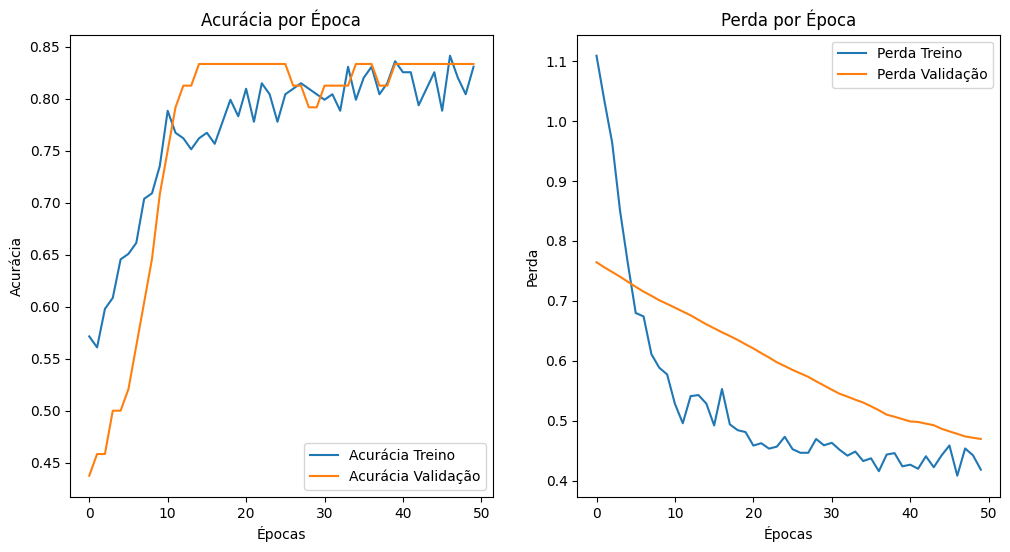

In [69]:
# Acurácia

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia por Época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Perda

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda Treino')
plt.plot(history.history['val_loss'], label='Perda Validação')
plt.title('Perda por Época')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

In [70]:
# Avaliando com conjunto de testes

print('\n=== Avaliação do modelo (Teste) ===\n')
results = model.evaluate(X_test, y_test, batch_size=32)

print('\nPerda (teste): {}\nAcurácia (Teste): {}'.format(round(results[0],3), round(results[1],3)))



=== Avaliação do modelo (Teste) ===

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7500 - loss: 0.5837 

Perda (teste): 0.561
Acurácia (Teste): 0.75
